In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import seaborn as sns; sns.set()  # for plot styling
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import scipy

In [2]:
user_scores = pd.read_csv("../profiles/question_scores.csv", encoding='latin1', index_col='Id')
scores = user_scores.as_matrix(columns=user_scores.columns[1:])

In [63]:
scores.max()

5190.0

In [3]:
user_counts = pd.read_csv("../profiles/question_counts.csv", encoding='latin1',index_col='Id')
counts = user_counts.as_matrix(columns=user_counts.columns[1:])

In [65]:
counts.max()

141.0

In [66]:
user_scores.index.tolist() == user_scores.index.tolist()

True

In [67]:
scores.sum(axis=1).argmax()

1467

In [4]:
score_array = scores.sum(axis=1)
count_array = counts.sum(axis=1)

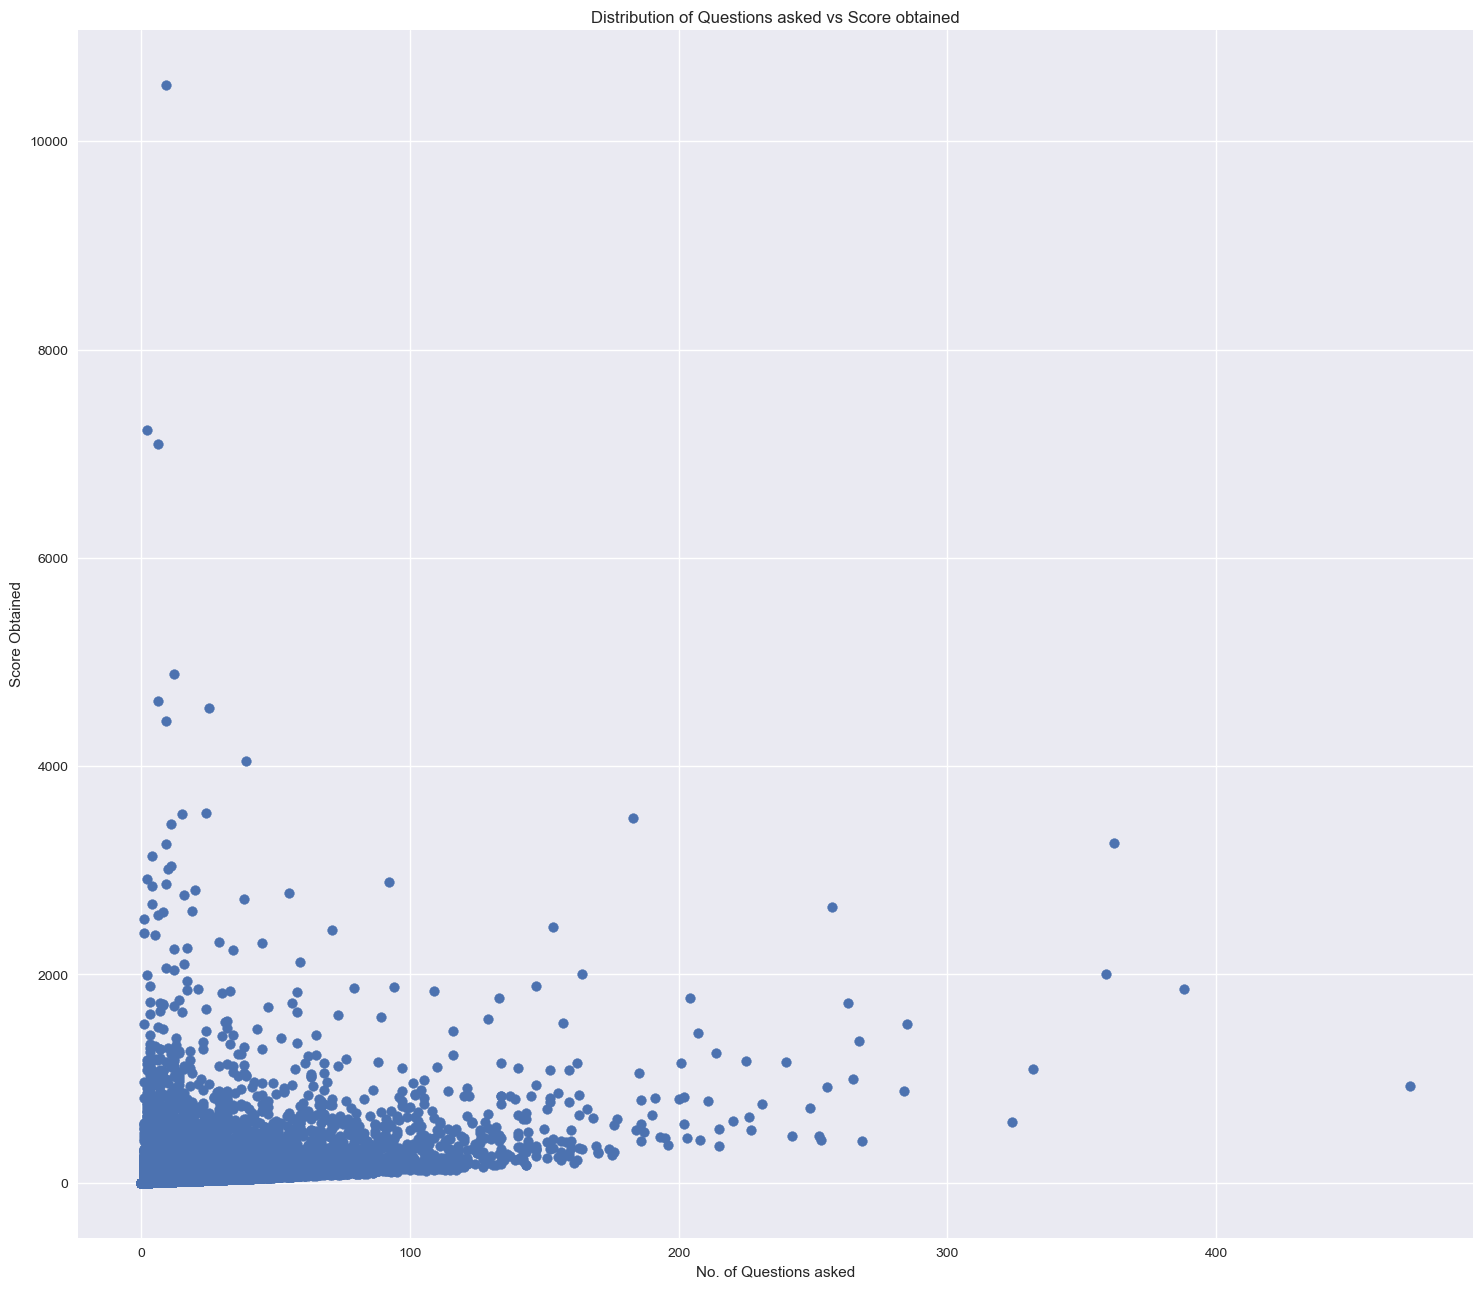

In [86]:
fig=plt.figure(figsize=(18, 16), dpi= 100)
plt.xlabel("No. of Questions asked")
plt.ylabel("Score Obtained")
plt.title("Distribution of Questions asked vs Score obtained")
plt.scatter(count_array, score_array)

In [78]:
# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(np.column_stack((count_array,score_array)))
# Predicting the clusters
labels = kmeans.predict(np.column_stack((count_array,score_array)))
# Getting the cluster centers
C = kmeans.cluster_centers_

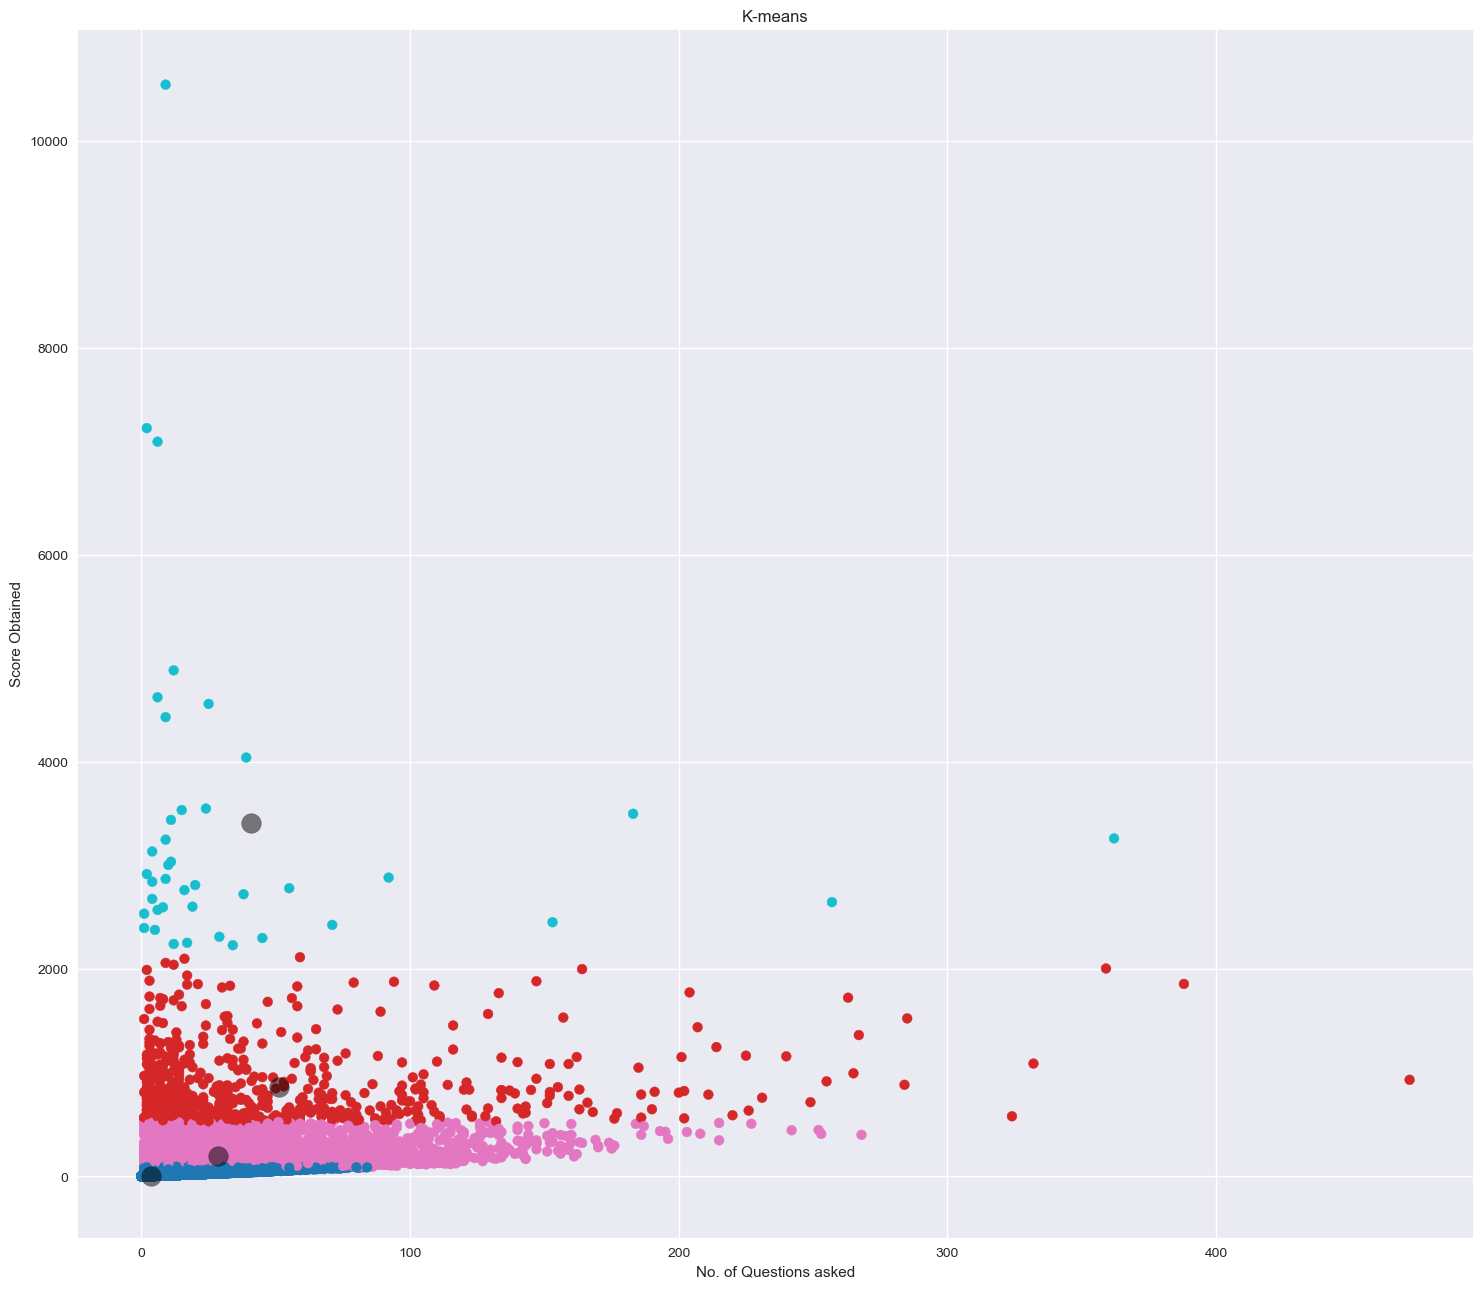

In [89]:
fig=plt.figure(figsize=(18, 16), dpi= 100)
plt.xlabel("No. of Questions asked")
plt.ylabel("Score Obtained")
plt.title("K-means")
plt.scatter(count_array, score_array, c=labels,s=50, cmap='tab10')
plt.scatter(C[:, 0], C[:, 1], s=200, c='black', alpha=0.5)

In [90]:
del C

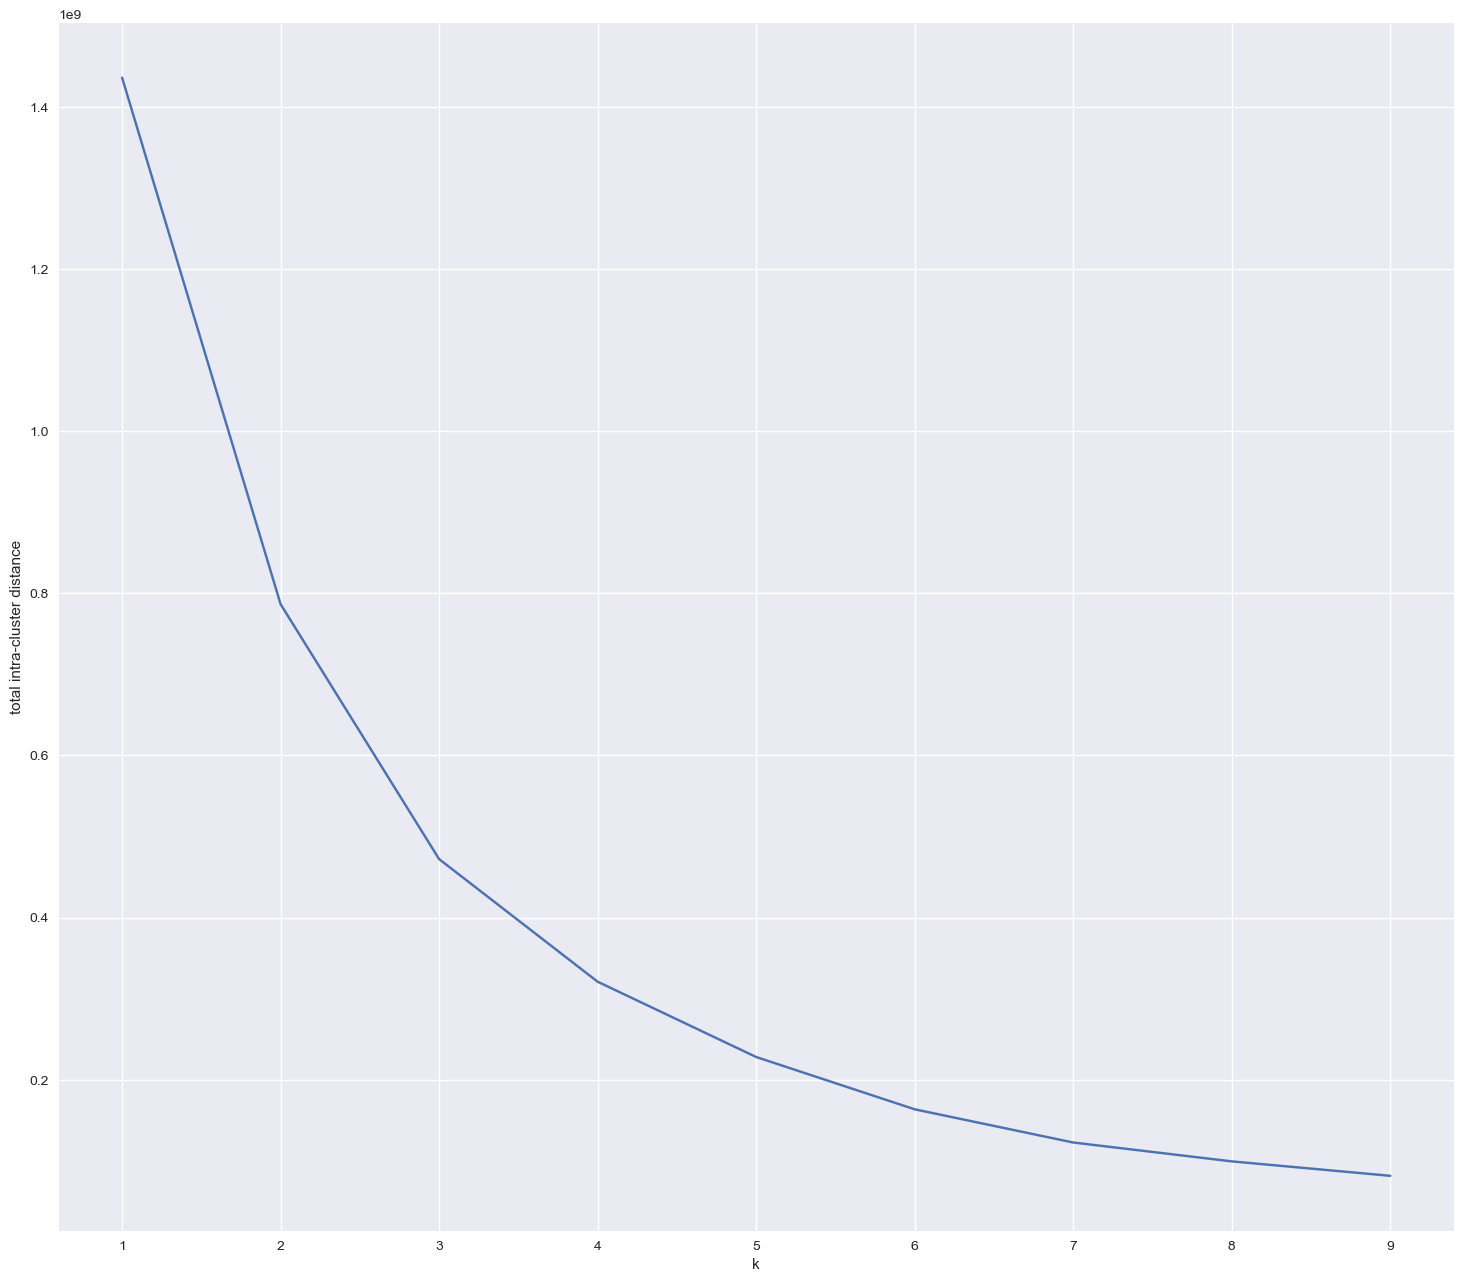

In [7]:
fig=plt.figure(figsize=(18, 16), dpi= 100)
# clustering for k = 1 to k = 10
ks = range(1,10)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(np.column_stack((count_array,score_array)))
    scores.append(-model.score(np.column_stack((count_array,score_array))))

plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()